In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import cross_val_score




# REFER: 

https://urytrayudu1.medium.com/sentiment-analysis-for-yelp-review-classification-54b65c09ff7b


https://cs229.stanford.edu/proj2014/Yun%20Xu,%20Xinhui%20Wu,%20Qinxia%20Wang,%20Sentiment%20Analysis%20of%20Yelp's%20Ratings%20Based%20on%20Text%20Reviews.pdf




# EXTRA: 

https://towardsdatascience.com/text-mining-and-sentiment-analysis-for-yelp-reviews-of-a-burger-chain-6d3bcfcab17b

- can help find the most frequently used words...


using this youc can check - 5 star reviews, frequent words
1 star review, frquent words used....


* STEMMING
Obviously, “burger” and “burgers” are saying the same thing and we can do better than that by using stemming. 
Stemming is the process of transforming words into root forms, even if the stemmed word is not a valid word in the language. In general, stemming will tend to chop off suffixes such as “-ed” and “ing” as well as plural forms.






https://medium.com/analytics-vidhya/performing-sentiment-analysis-on-yelp-restaurant-reviews-962334d6336d

- polarity and subjectivity

Polarity returns a float value that is in the range of [-1,1] where 1 means a positive statement and -1 means a negative statement. Subjectivity is also a float value that is in the range of [0,1]. 0 means a personal opinion and 1 means factual information.



Paper : https://cs229.stanford.edu/proj2014/Yun%20Xu,%20Xinhui%20Wu,%20Qinxia%20Wang,%20Sentiment%20Analysis%20of%20Yelp's%20Ratings%20Based%20on%20Text%20Reviews.pdf



In [2]:
######## To be removed before submission, do not uncomment ########

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# notebook_path = os.path.abspath('/content')
# print(notebook_path)

In [3]:
# Load the dataset

filepath = "yelp.csv"
df = pd.read_csv(filepath)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
# Check for size of data
df.shape

(10000, 10)

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


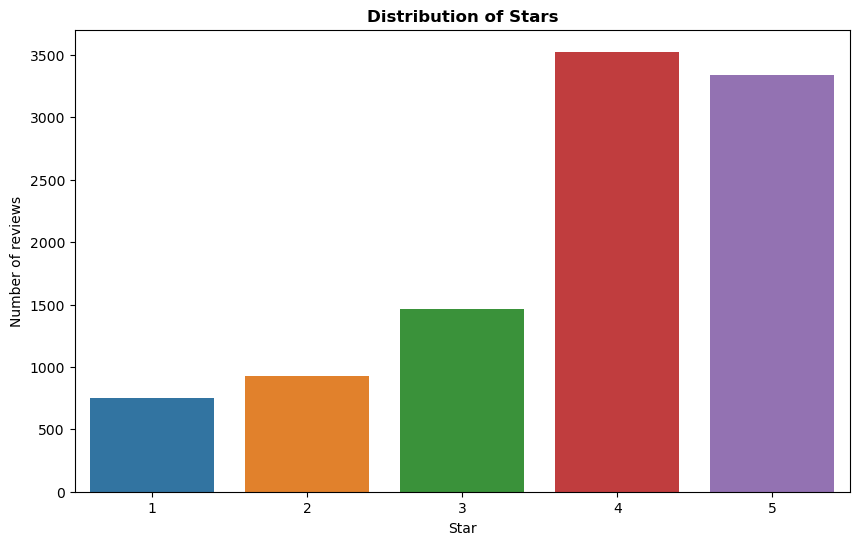

In [7]:
# Checking the distribution

plt.figure(figsize=(10,6))

sns.countplot(x='stars', data=df)
plt.title('Distribution of Stars', fontweight="bold")

plt.xlabel('Star')
plt.ylabel('Number of reviews')
plt.show()


#### The dataset appears to be unbalanced as the number of reviews with a rating of 4 and 5 stars is much higher than the number of reviews with a rating of 1, 2, or 3 stars.

This can lead to issues when building a sentiment analysis model as it may become biased towards predicting positive sentiments due to the higher number of positive reviews. To mitigate this, techniques such as resampling the data or adjusting the class weights can be used.

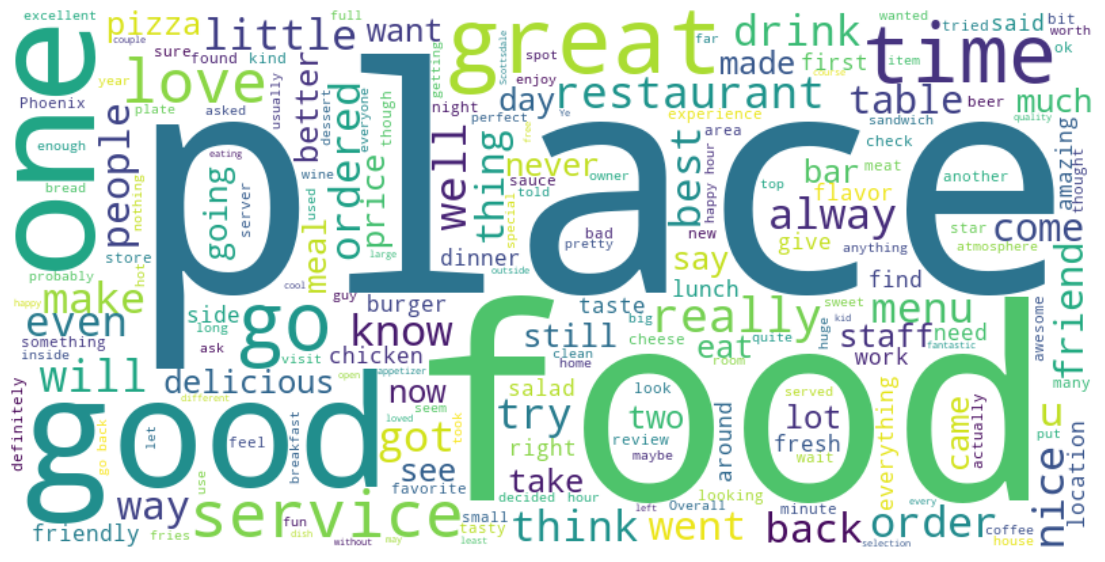

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

text = " ".join(review for review in df.text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the word cloud, we can see that the words "good" and "great" are two adjectives that were used a lot for the reviews. This doesn't necessarily mean anything since the actual sentences could have a negation before these adjectives, thus changing the meaning of the review.

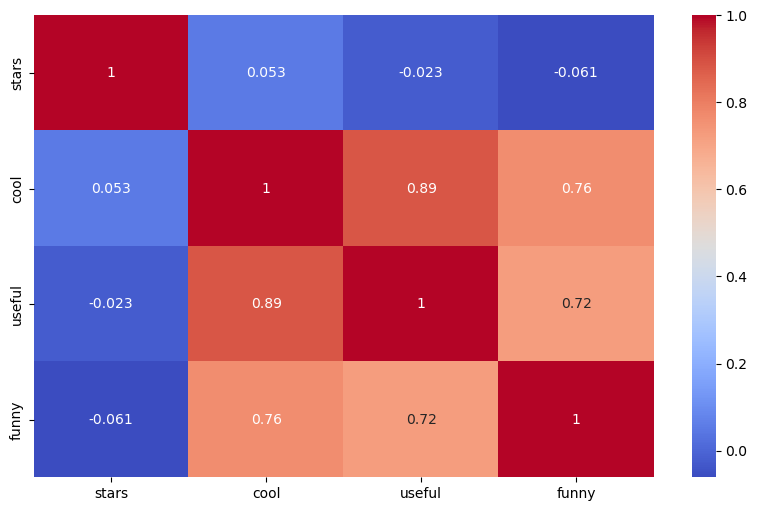

In [9]:
plt.figure(figsize=(10,6))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

Looking at the map, funny is strongly correlated with useful, and useful seems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.


# Data Cleaning

### 1. Missing Values

In [10]:
# Check for missing values 
df.isna().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

There is no missing data.

### 2. Duplicates

In [11]:
# check for duplicate rows
duplicate_rows = df[df.duplicated()]

# check if there are any duplicates
if duplicate_rows.empty:
    print("There are no duplicate rows in the dataset.")
else:
    # print the duplicate rows
    print("Duplicate rows in the dataset are:", duplicate_rows)

There are no duplicate rows in the dataset.


### 3. Change Data Type

In [12]:
# Convert the date column to a datetime data type
df['date'] = pd.to_datetime(df['date'])

# Check the data type of the date column
print(df['date'].dtype)

datetime64[ns]


### 4. Removing Irrelevant Column 

In [13]:
df['type'].value_counts()

review    10000
Name: type, dtype: int64

Since all rows in the column 'type' are 'review', hence unecessary column.

In [14]:
df = df.drop('type', axis=1)
df

,business_id,date,review_id,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,0lyVoNazXa20WzUyZPLaQQ,0,0,0


### 5. Create new features

In [15]:
df['review length'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,user_id,cool,useful,funny,review length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


* Knowing the length of each review can provide insights into the writing style of the reviewers and the amount of detail they provide.

* It can also help in identifying any patterns in the data, such as whether longer reviews tend to be more positive or negative compared to shorter reviews. 


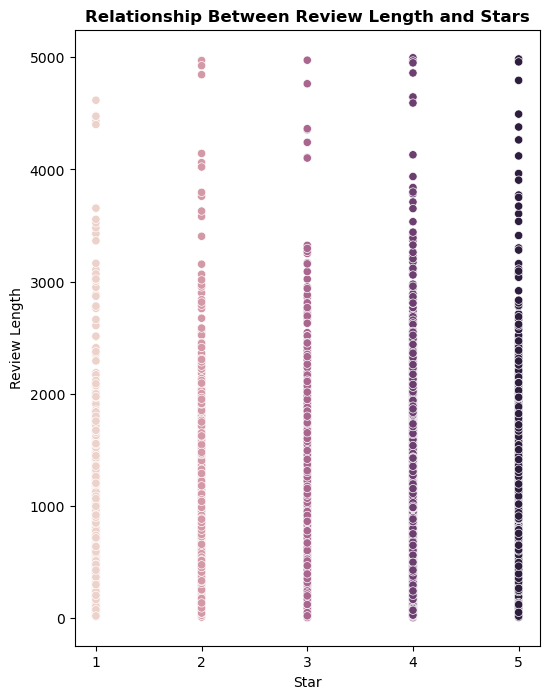

In [16]:
plt.figure(figsize=(6,8))

sns.scatterplot( x='stars', y='review length', hue= 'stars', data=df, legend=False)
plt.title('Relationship Between Review Length and Stars', fontweight="bold")
plt.xticks(np.arange(1, 6, 1))

plt.ylabel('Review Length')
plt.xlabel('Star')
plt.show()

#### Creating a column named ‘sentiment’,  where we assign the sentiment grouping values.

Classifies the sentiment of Yelp reviews into one of five categories: bad, poor, neutral, good, great

In [17]:
df.loc[df['stars'] == 1, 'sentiment'] = 'bad' 
df.loc[df['stars'] == 2, 'sentiment'] = 'poor' 
df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] == 4, 'sentiment'] = 'good' 
df.loc[df['stars'] == 5, 'sentiment'] = 'great' 

In [18]:
df.head(15)

,business_id,date,review_id,stars,text,user_id,cool,useful,funny,review length,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,great
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,great
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,good
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0,419,great
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,great
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094,good
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565,great
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",1ieuYcKS7zeAv_U15AB13A,0,1,0,274,good
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349,good
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186,great


# Now, to fix the imbalance in the dataset, there are several ways:

This is done because an imbalanced dataset can bias the model towards the majority class and result in poor performance on the minority class.


#### 1. Undersampling: 
* Randomly remove some samples from the majority class to balance the dataset.

#### 2. Oversampling
* Randomly duplicate some samples from the minority class to balance the dataset.

#### 3. Synthetic Minority Over-sampling Technique (SMOTE)
* New samples are generated for the minority class using the k-nearest neighbor algorithm.


# Undersample

In [19]:
# Count the number of samples in each class
class_counts = df['stars'].value_counts()
print('Original class counts:')
print(class_counts)


# Downsample the majority class (in this case, 4-star reviews)
downsampled = pd.concat([
    df[df['stars'] == 1].sample(class_counts.min(), random_state=96),
    df[df['stars'] == 2].sample(class_counts.min(), random_state=96),
    df[df['stars'] == 3].sample(class_counts.min(), random_state=96),
    df[df['stars'] == 4].sample(class_counts.min(), random_state=96),
    df[df['stars'] == 5].sample(class_counts.min(), random_state=96)
])

# Count the number of samples in each class again
class_counts = downsampled['stars'].value_counts()
print('Downsampled class counts:')
print(class_counts)

Original class counts:
4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64
Downsampled class counts:
1    749
2    749
3    749
4    749
5    749
Name: stars, dtype: int64


The original dataset is being downsampled, which means that some of the observations from the majority class (in this case, reviews with 4 and 5 stars) are randomly removed to balance the dataset. 

The value_counts() method is used to count the number of observations in each class in the original dataset. The sample() method is then used to randomly select a subset of observations from the majority class (4 and 5 stars) equal to the number of observations in the minority class (1 and 2 stars). The resulting downsampled dataset has an equal number of observations in each class.

The downsampling is done to create a balanced dataset for training a machine learning model that can accurately classify the sentiment of Yelp reviews into one of five categories: bad, poor, neutral, good, great. By using a balanced dataset, the model can learn from a representative sample of each class and make accurate predictions on new, unseen data.

# Storing the cleaned dataset

In [20]:
# assume that the cleaned data is stored in a variable called "cleaned_data"
df.to_csv('cleaned_yelp_data.csv', index=False)

---------------



# Sentiment Analysis of Yelp reviews involves two broad steps: 


1. Text preprocessing
2. Multiclass classification. 


### Part 1
In the text preprocessing stage, natural language processing (NLP) techniques will be used to prepare the reviews for analysis.

1. Tokenization
2. Lemmat
3. Vectorized


* The reviews will undergo tokenization, where they will be split into individual words or tokens. 

* Stop words, such as "the" and "and," will be removed to reduce noise in the data. 

* The remaining words will be lemmatized, where they will be transformed into their base form to reduce the number of unique words in the dataset. 

* Finally, the reviews will be vectorized, where each review will be represented as a numerical vector. 



### Part 2

* In the multiclass classification stage, classification models such as Naïve Bayes, SVM, and Random Forest will be trained on the processed reviews. 

* These models will classify the reviews into five categories. By using these techniques, we can develop accurate and robust sentiment analysis models for Yelp reviews.


# Text preprocessing


The goal of text preprocessing is to clean and transform the raw text data in such a way that it becomes easier to analyze. 


#### STEPS:

* Tokenization: Process of splitting the text into individual words/tokens.

* Stop word removal: Removing common meaningless words, such as "the" & "and".

* Lemmatization: Transforming each word to its base form to reduce the number of unique words in the dataset.

* Vectorization: Representing each review as a numerical vector so that it can be used as input to machine learning models.



In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

* The wordnet is a lexical database that provides information about words, such as their meanings, synonyms, and antonyms.

* stop_words is a set of English stopwords that is used to remove them from text data.

* lemmatizer is an object of WordNetLemmatizer class, which is used to perform lemmatization on words. Lemmatization is the process of reducing words to their base or root form so that they can be compared more easily. For example, the words "running", "ran", and "runs" can be reduced to their base form "run". By removing variations of words like this, we can reduce the number of unique words in the dataset and make it easier to analyze.


In [22]:
# Download stopwords and wordnet dictionary

nltk.download('wordnet')
nltk.download('stopwords')


# Initialize stop words and lemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/deepanshumalhotra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deepanshumalhotra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Define a function to preprocess the text

def preprocess_text(text):
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text


Preprocessing text data and then converting it into a numerical vector format.

First, a function named 'preprocess_text' is defined to preprocess the text data. 
This function takes the text as an input, tokenizes it by splitting it into individual words or tokens, removes stop words like "the" & "and" which don't carry much meaning, lemmatizes the tokens which involves reducing each word to its base form to reduce the number of unique words in the dataset, and then joins the tokens back into a single string.








In [24]:
# Apply the preprocess_text function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Initialize the count vectorizer
vectorizer = CountVectorizer()
# Fit and transform the processed text
X = vectorizer.fit_transform(df['processed_text'])

Then, function named 'preprocess_text' is applied to the 'text' column of the dataframe and the resulting preprocessed text is stored in a new column named 'processed_text'.

After preprocessing the text data, a CountVectorizer object is initialized, which will convert the preprocessed text data into numerical vectors. 

The fit_transform() method is called on the vectorizer object to fit the text data to the vectorizer and transform it into a numerical format. This numerical representation of the preprocessed text data is stored in the variable 'X'.


## Constructing word cloud for Cleaned Dataset

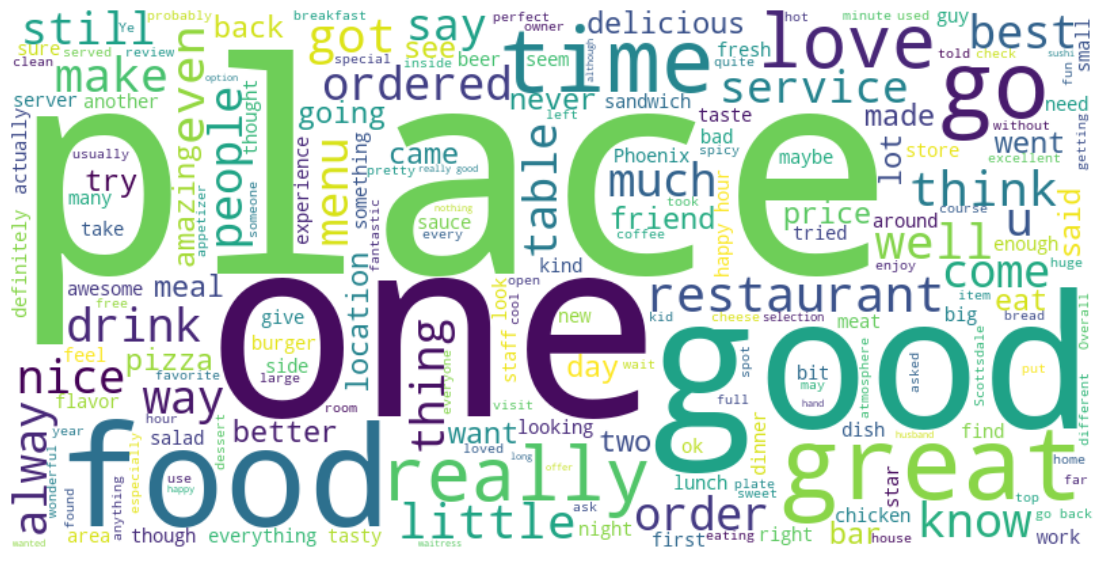

In [35]:
plt.figure(figsize=(14,10))

text = " ".join(review for review in df.processed_text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## For each start find 10 most frequently used words

In [68]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

df2 = df.groupby("stars")

my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place'])

for i1 in range(1,6):
    df3 = df2.get_group(i1)
    text = " ".join(review for review in df3.processed_text)
    
    # tokenize text into words
    tokens = word_tokenize(text)

    # tag each token with its part of speech
    tagged_tokens = pos_tag(tokens)

    # extract only adjectives
    adjectives = [word for word, pos in tagged_tokens if pos == 'JJ']

    token_dist = FreqDist(adjectives)
    top_words = token_dist.most_common(10)
    print(i1, top_words)
    
#     lower_full_text = text.lower()
#     word_tokens = word_tokenize(lower_full_text)
#     tokens = list()
#     for word in word_tokens:
#         if word.isalpha() and word not in my_stop_words:
#             tokens.append(word)
#     token_dist = FreqDist(tokens)
#     top_words = token_dist.most_common(5)
#     print(i1, top_words)



# Working stuff
# for i1 in range(1,6):
#     df3 = df2.get_group(i1)
#     text = " ".join(review for review in df3.processed_text)
    
#     lower_full_text = text.lower()
#     word_tokens = word_tokenize(lower_full_text)
#     tokens = list()
#     for word in word_tokens:
#         if word.isalpha() and word not in my_stop_words:
#             tokens.append(word)
#     token_dist = FreqDist(tokens)
#     top_words = token_dist.most_common(5)
#     print(i1, top_words)
    
# #     dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

#     # tokenize text
#     tokens = nltk.word_tokenize(text)

#     # remove stop words
#     stop_words = nltk.corpus.stopwords.words('english')
#     filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

#     # calculate word frequency
#     fdist = FreqDist(filtered_tokens)
    
#     # print top 5 most frequent words
#     top_words = fdist.most_common(5)
#     print(i1, top_words)

# from nltk.tokenize import word_tokenize
# from nltk import FreqDist
# lower_full_text = full_text.lower()
# word_tokens = word_tokenize(lower_full_text)
# tokens = list()
# for word in word_tokens:
#     if word.isalpha() and word not in my_stop_words:
#         tokens.append(word)
# token_dist = FreqDist(tokens)
# dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])
    
# plt.figure(figsize=(14,10))

# text = " ".join(review for review in df.processed_text)
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

1 [('good', 274), ('u', 175), ('bad', 146), ('table', 103), ('last', 100), ('first', 89), ('much', 88), ('new', 87), ('little', 84), ('many', 81)]
2 [('good', 586), ('great', 227), ('bad', 170), ('u', 168), ('much', 168), ('little', 142), ('nice', 121), ('new', 112), ('many', 106), ('small', 100)]
3 [('good', 1137), ('great', 490), ('little', 368), ('nice', 317), ('bad', 211), ('much', 206), ('small', 193), ('u', 173), ('sure', 172), ('big', 146)]
4 [('good', 2563), ('great', 1777), ('little', 918), ('nice', 757), ('delicious', 544), ('fresh', 426), ('much', 406), ('happy', 399), ('u', 392), ('small', 361)]
5 [('great', 1622), ('good', 1478), ('little', 538), ('delicious', 517), ('nice', 450), ('fresh', 399), ('favorite', 379), ('u', 367), ('first', 344), ('many', 337)]


In [ ]:
df.head()

# Target Variable



In [26]:
# Define the target variable
def get_sentiment(stars):
    if stars == 5:
        return 'Bad'
    elif stars == 4:
        return 'Poor'
    elif stars == 3:
        return 'Neutral'
    elif stars == 2:
        return 'Good'
    else:
        return 'Great'

df['sentiment'] = df['stars'].apply(get_sentiment)
target = df['stars']

Target is the variable that we want to predict based on the input data. In this case, the target variable is the sentiment of the Yelp reviews, which we want to classify into one of five categories: bad, poor, neutral, good, great.

'target' variable is created using the Yelp dataset's 'stars' column, where a custom function 'get_sentiment' is applied to convert the star rating into one of the five sentiment categories. This target variable will be used as the output or prediction variable for the sentiment analysis model that we want to build.

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target_encoded = le.fit_transform(target)

Label encoding or Categorical encoding: To use classification algorithms like Naive Bayes, SVM, and Random Forest on a string target variable, we need to convert the text labels to numerical values. 


In [28]:
target.dtypes

dtype('int64')

# Multiclass classification


Multiclass classification is a type of machine learning problem where the goal is to predict one of several possible classes. 

In this case, we want to predict the sentiment of Yelp reviews, which can be positive, negative, or neutral. To do this, we will train classification models such as Naïve Bayes, SVM, and Random Forest on the preprocessed reviews. These models will learn to recognize patterns in the data and use those patterns to make predictions about the sentiment of new reviews.


In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=91)

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [31]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier and train it on the training set
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.30      0.40       213
           2       0.41      0.10      0.16       266
           3       0.31      0.07      0.12       441
           4       0.43      0.73      0.54      1071
           5       0.61      0.55      0.58      1009

    accuracy                           0.48      3000
   macro avg       0.47      0.35      0.36      3000
weighted avg       0.48      0.48      0.45      3000



In [32]:
# Initialize the SVM classifier and train it on the training set
svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.20      0.30       213
           2       0.48      0.06      0.10       266
           3       0.42      0.10      0.16       441
           4       0.43      0.66      0.52      1071
           5       0.56      0.64      0.59      1009

    accuracy                           0.48      3000
   macro avg       0.50      0.33      0.34      3000
weighted avg       0.49      0.48      0.44      3000



In [33]:
# Initialize the RandomForrest classifier and train it on the training set
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.16      0.26       213
           2       0.35      0.03      0.05       266
           3       0.29      0.05      0.09       441
           4       0.40      0.64      0.49      1071
           5       0.53      0.59      0.56      1009

    accuracy                           0.45      3000
   macro avg       0.44      0.30      0.29      3000
weighted avg       0.44      0.45      0.40      3000

